# 环境配置及导入模块

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
from toad.transform import Combiner
from matplotlib import pyplot as plt
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

pd.set_option("display.width", 10000)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# 加载数据

In [2]:
data = pd.read_csv("../data_file/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 特征工程

## 目标转换

In [3]:
data["Churn"] = data["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

## 类型转换

In [4]:
data["TotalCharges"] = data["TotalCharges"].replace(" ", "0")
data["TotalCharges"] = data["TotalCharges"].astype(float)

## 特征分箱

In [5]:
ex_lis = ["customerID", "Churn", "MonthlyCharges", "TotalCharges", "tenure"]
combiner = Combiner()
combiner.fit(data, data['Churn'], method='chi', min_samples = 0.05,
             exclude=ex_lis)

In [6]:
new_data = combiner.transform(data)

## 合并数据 

In [7]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
        'PaymentMethod']
new_data = new_data[cols]
_data = data[["customerID", "tenure", "Churn", "MonthlyCharges", "TotalCharges"]].join(new_data)

## 划分数据集

In [8]:
train, test = train_test_split(_data.iloc[:, 1:], test_size=0.3, random_state=2022)

# 建模

In [9]:
cph = CoxPHFitter()
cph.fit(train, "tenure", "Churn")

<lifelines.CoxPHFitter: fitted with 4930 total observations, 3623 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 4930 total observations, 3623 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 4930
number of events observed = 1307
   partial log-likelihood = -8430.97
         time fit was run = 2022-02-23 10:22:41 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
MonthlyCharges     0.04       1.04       0.00             0.03             0.05                 1.03                 1.05
TotalCharges      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gender             0.02       1.02       0.06            -0.09             0.13                 0.91                 1.14
SeniorCitizen      0.08       1.08       0.07            -0.05             0.21                 0.95                 1.24
Partner            0.23       1.26       0.07             0.10             0.36                 1.11                 1.43
Dependents         0.07       1.07       0.08            -0.10             0.23                 0.91                 1.26
PhoneService       0.56       1.75       0.15             0.26             0.85                 1.30                 2.34
MultipleLines     -0.10       0.91       0.06            -0.22             0.03                 0.80                 1.03
InternetService    0.22       1.25       0.15            -0.08             0.52                 0.93                 1.68
OnlineSecurity     0.34       1.40       0.08             0.19             0.49                 1.21                 1.63
OnlineBackup       0.18       1.20       0.06             0.06             0.30                 1.06                 1.35
DeviceProtection  -0.03       0.97       0.06            -0.15             0.10                 0.86                 1.10
TechSupport        0.16       1.18       0.08             0.01             0.31                 1.01                 1.36
StreamingTV       -0.04       0.96       0.07            -0.17             0.09                 0.85                 1.10
StreamingMovies    0.01       1.01       0.07            -0.12             0.14                 0.89                 1.15
Contract           1.68       5.39       0.10             1.49             1.88                 4.45                 6.53
PaperlessBilling   0.15       1.16       0.07             0.02             0.28                 1.02                 1.33
PaymentMethod      0.13       1.14       0.03             0.07             0.18                 1.08                 1.20

                      z      p   -log2(p)
covariate                                
MonthlyCharges     9.16 <0.005      64.01
TotalCharges     -32.39 <0.005     762.00
gender             0.35   0.73       0.46
SeniorCitizen      1.18   0.24       2.08
Partner            3.49 <0.005      11.04
Dependents         0.81   0.42       1.26
PhoneService       3.72 <0.005      12.30
MultipleLines     -1.54   0.12       3.00
InternetService    1.46   0.14       2.80
OnlineSecurity     4.49 <0.005      17.09
OnlineBackup       2.93 <0.005       8.19
DeviceProtection  -0.44   0.66       0.60
TechSupport        2.12   0.03       4.89
StreamingTV       -0.57   0.57       0.81
StreamingMovies    0.15   0.88       0.18
Contract          17.17 <0.005     217.00
PaperlessBilling   2.25   0.02       5.34
PaymentMethod      4.68 <0.005      18.40
---
Concordance = 0.93
Partial AIC = 16897.95
log-likelihood ratio test = 4080.75 on 18 df
-log2(p) of ll-ratio test = inf

# 可视化

## 特征重要性

<AxesSubplot:xlabel='log(HR) (95% CI)'>

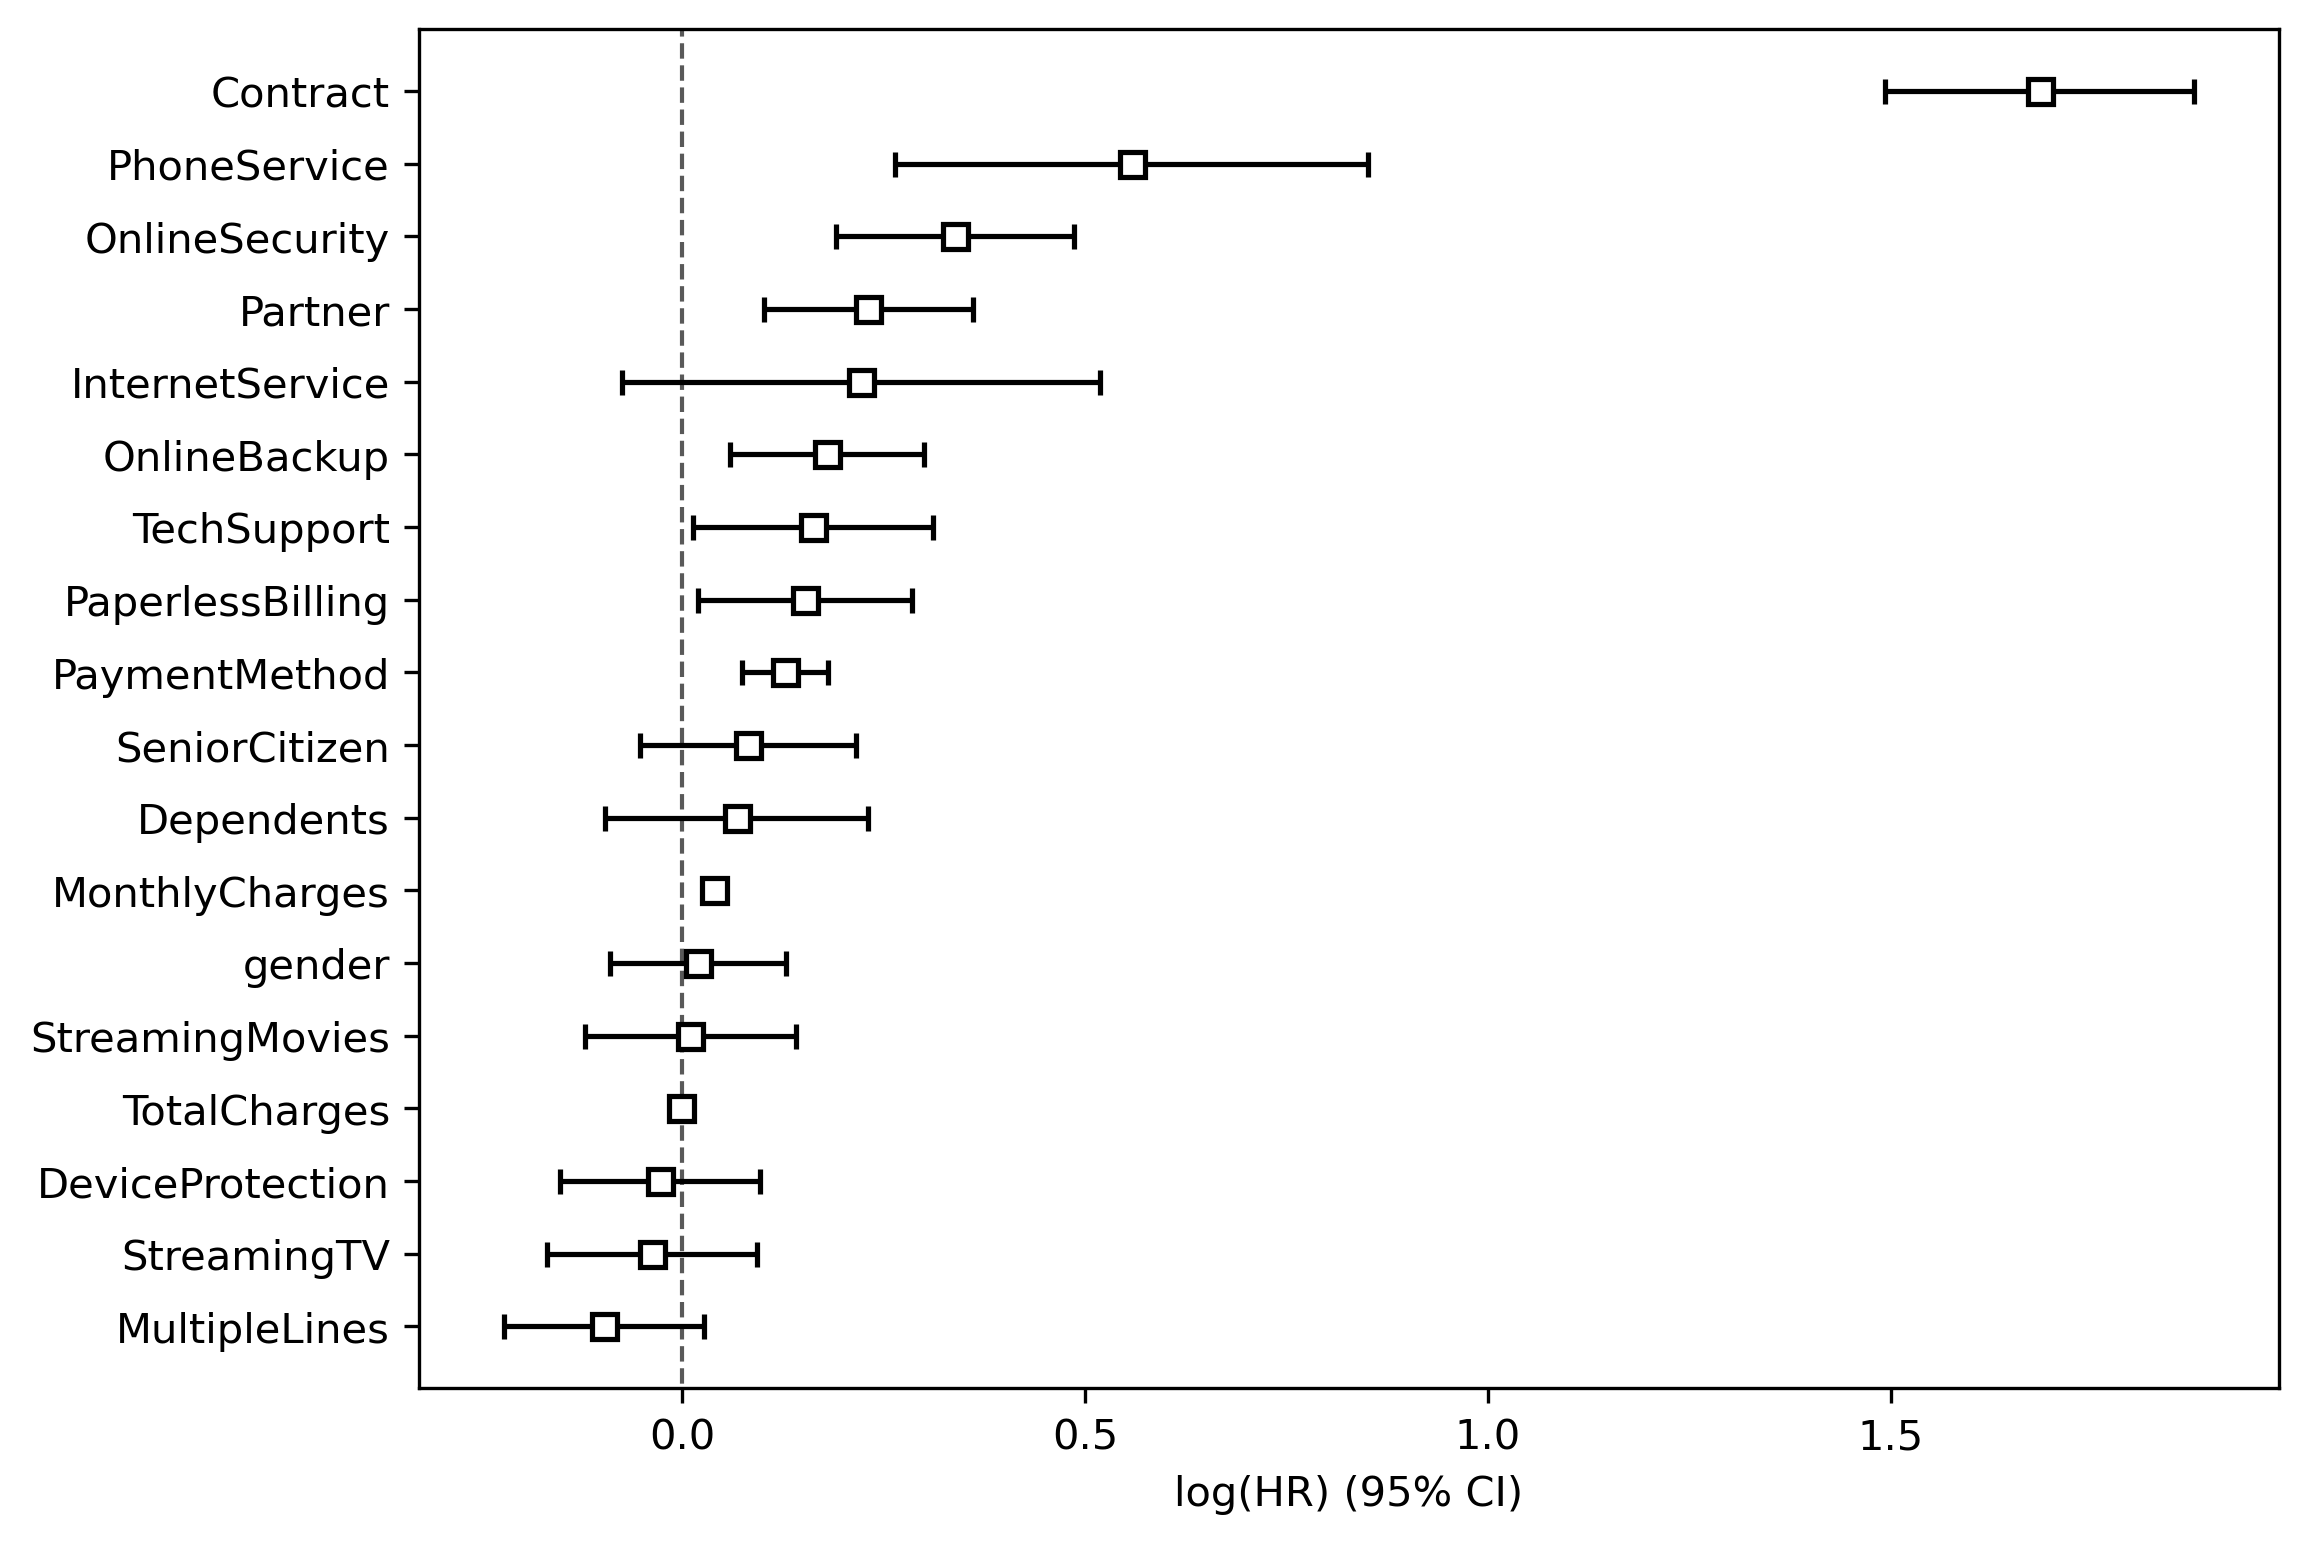

In [12]:
plt.figure(figsize=(8, 6), dpi=300)
cph.plot()